# Task 2
 Let G = ({1, 2, 3, 4, 5, 6}, {1 → 2, 2 → 1, 2 → 2, 2 → 6, 2 → 3, 3 → 4, 4 → 5, 5 →
6, 6 → 1, 6 → 6}). Consider a random walk on G and find numerically its ergodic
probabilities.

In [1]:
import numpy as np
import numba
from numba.typed import Dict
from numba.core import types
from matplotlib import pyplot as plt
from time import time

In [2]:
@numba.njit()
def random_walk(graph, initial_node, steps):
    current_node = initial_node
    node_path = np.zeros(steps, dtype=numba.int16)
    for step in range(steps):
        choice = np.random.choice(graph[current_node])
        if choice != -1:
            current_node = choice
        node_path[step] = current_node
    return node_path

In [3]:
@numba.njit()
def ergodic_probabilities_from_path(graph, node_path):
    node_count = np.bincount(node_path)
    return node_count / len(node_path)

In [4]:
G = {
    1: [2],
    2: [1, 2, 6, 3],
    3: [4],
    4: [5],
    5: [6],
    6: [1, 6]
}
G_numba = Dict.empty(key_type=types.int16, value_type=types.int32[:])
for key, value in G.items():
    print(key, value)
    G_numba[key] = np.array(value)

1 [2]
2 [1, 2, 6, 3]
3 [4]
4 [5]
5 [6]
6 [1, 6]


C:\Users\thejg\Desktop\Programming\projects39\lib\site-packages\numba\typed\typeddict.py:34: NumbaTypeSafetyWarning: unsafe cast from int64 to int16. Precision may be lost.
  d[key] = value


In [5]:
steps = 10000

In [6]:
%%timeit
ergodic_probabilities_from_path(G_numba,
                                random_walk(G_numba, 1, steps))

341 µs ± 20.3 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [7]:
steps = 100_000_000

In [8]:
start_time = time()
walk_result = random_walk(G_numba, 1, steps)
probabilities = ergodic_probabilities_from_path(G_numba, walk_result)
stop_time = time()
time_ = stop_time - start_time

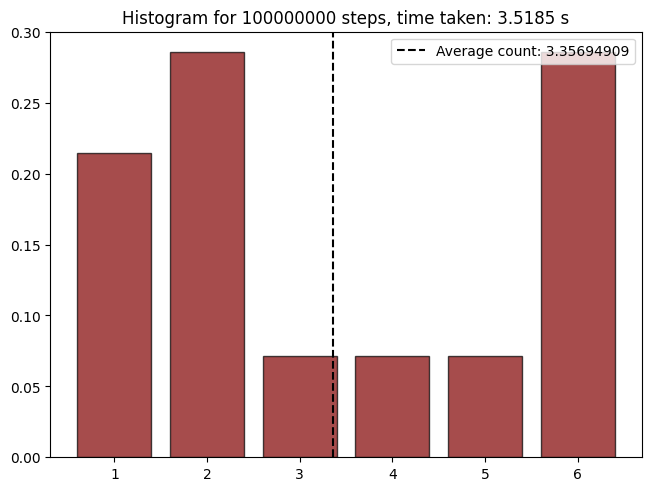

In [9]:
figure, axes = plt.subplots(1, 1, layout='constrained')
mean_value = walk_result.mean()
axes.hist(walk_result,
          color='maroon',
          density=True,
          alpha=0.7,
          bins=6,
          align='mid',
          ec='black',
          rwidth=0.8,
          range=(0.5, 6.5))
axes.axvline(mean_value,
             color='black',
             linestyle='--',
             label=f'Average count: {mean_value}')
axes.set(title=f'Histogram for {steps} steps, time taken: {time_:.4f} s',
         xticks=list(G.keys()))
axes.legend()

In [10]:
print(probabilities)

[0.         0.21429019 0.28575382 0.07143078 0.07143078 0.07143078
 0.28566365]
